<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%204%20-%20Interacci%C3%B3n%20Hombre%20M%C3%A1quina/1_Procesamiento%20Lenguaje%20Natural/NLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Debido a que la base de datos es muy pesada (más de 100 Mb), se debe descargar del siguiente enlace y cargarlo en el ambiente de prueba de google colab.

https://drive.google.com/file/d/1MmMFoFvNYs_0biP9LbtAHfC__b-Zsjw4/view?usp=sharing

In [ ]:
# Para subir el archivo desde nuestro computador:
from google.colab import files
files = files.upload()

Saving consumer_complaints.csv to consumer_complaints.csv


In [ ]:
# Luego lo convertimos a un dataframe de pandas
import io
import pandas as pd

# data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df = pd.read_csv('consumer_complaints.csv')
# Imprimir las primeras líneas
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [ ]:
# Eliminamos los registros que no tienen narrativa del cliente
df = df.dropna(subset=['consumer_complaint_narrative'])
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


In [ ]:
import re

# Importamos el conjunto de stopwords del idioma inglés para eliminarlos posteriormente
import nltk  
from nltk.corpus import stopwords

nltk.download('stopwords')
en_stops = set(stopwords.words('english'))

# expresion regular para eliminar los caracteres que no estén en la lista
caracteres_eliminar = re.compile('[^0-9a-z #+_]')

# expresion regular para reemplazar por espacio los caracteres siguientes
caracteres_reemplazar =  re.compile('[/(){}\[\]\|@,;]')

def limpiar(texto):
  texto = texto.lower()
  texto = texto.replace('x', '')
  texto = caracteres_eliminar.sub('', texto)
  texto = caracteres_reemplazar.sub(' ', texto)
  texto = ' '.join(word for word in texto.split() if word not in en_stops)
  return texto

df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(limpiar)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,claimed owe 2700 years despite proof payment s...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,due inconsistencies amount owed told bank amou...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,wages earned job decreased almost half knew tr...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,open current mortgage chase bank # chase repor...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,submitted time submitted complaint dealt rushm...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


In [ ]:
# Ahora analicemos la columna Product, la cual se refiere al producto del cual el cliente se quejó
df['product'].value_counts()

Debt collection            17552
Mortgage                   14919
Credit reporting           12526
Credit card                 7929
Bank account or service     5711
Consumer Loan               3678
Student loan                2128
Prepaid card                 861
Payday loan                  726
Money transfers              666
Other financial service      110
Name: product, dtype: int64

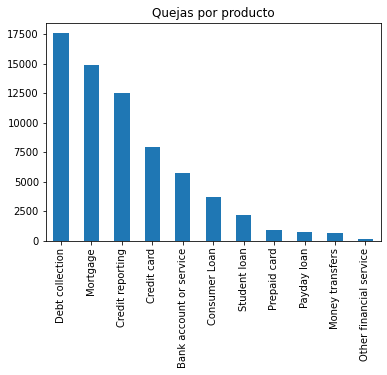

In [ ]:
df['product'].value_counts().plot(kind='bar', title='Quejas por producto')

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['consumer_complaint_narrative'].values)

X = tokenizer.texts_to_sequences(df['consumer_complaint_narrative'].values)
X[:2]

[[632,
  125,
  3527,
  41,
  499,
  160,
  5,
  23,
  1201,
  52,
  1522,
  3527,
  235,
  2280,
  125,
  42,
  246,
  205,
  846,
  80,
  197,
  24,
  1194,
  41,
  196],
 [34,
  36,
  191,
  7,
  6,
  36,
  118,
  1,
  53,
  246,
  202,
  978,
  255,
  25,
  211,
  76,
  101,
  70,
  282,
  1570,
  115,
  1,
  10,
  1480,
  390,
  768,
  2832,
  345,
  577,
  109,
  17,
  109,
  17,
  2432,
  645,
  44,
  4,
  7,
  6,
  43,
  44,
  34,
  4,
  255,
  1014,
  95,
  11,
  160,
  43,
  44,
  33,
  1418,
  5,
  908,
  843,
  8,
  23,
  25,
  43,
  1544,
  19,
  2645,
  8,
  2113,
  1306,
  282,
  1570,
  1,
  10,
  48,
  260,
  37,
  238,
  1,
  1430,
  88,
  609,
  537,
  44,
  981,
  573,
  1,
  10,
  37,
  537,
  44,
  1704,
  1226,
  2432,
  109,
  109,
  17,
  24,
  6,
  440,
  43,
  125,
  3568,
  2473,
  197,
  24,
  57,
  6,
  226,
  319,
  477,
  119,
  212,
  2110,
  169,
  192]]

In [ ]:
vocab_tam = len(tokenizer.word_index) + 1
vocab_tam

64787

In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Debemos tener todas las secuencias del mismo tamaño para que coincidan con las neuronas de la red
# Cortamos a un maximo de caracteres y llenamos con ceros las que tienen menos longitud

maxlen = 200

X = pad_sequences(X, padding='post', maxlen=maxlen)
X[:2]

array([[ 632,  125, 3527,   41,  499,  160,    5,   23, 1201,   52, 1522,
        3527,  235, 2280,  125,   42,  246,  205,  846,   80,  197,   24,
        1194,   41,  196,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
y = pd.get_dummies(df['product'])
y

,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
190126,0,0,0,0,1,0,0,0,0,0,0
190135,0,1,0,0,0,0,0,0,0,0,0
190155,0,0,0,0,0,0,1,0,0,0,0
190207,0,0,0,0,0,0,1,0,0,0,0
190208,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
553084,0,0,0,1,0,0,0,0,0,0,0
553085,0,0,0,1,0,0,0,0,0,0,0
553086,0,0,0,0,0,0,0,0,1,0,0
553090,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
products_names = y.columns
products_names

Index(['Bank account or service', 'Consumer Loan', 'Credit card',
       'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage',
       'Other financial service', 'Payday loan', 'Prepaid card',
       'Student loan'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

#y = df['product']

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.20, random_state = 14)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53444, 200) (53444, 11)
(13362, 200) (13362, 11)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

embedding_dim = 100

model1 = Sequential()
model1.add(layers.Embedding(vocab_tam, embedding_dim, input_length=maxlen))
model1.add(layers.GlobalMaxPool1D())
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(11, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

history = model1.fit(X_train, y_train,
                    epochs=3,
                    verbose=True,
                    batch_size=64)
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          6478700   
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                121       
Total params: 6,479,831
Trainable params: 6,479,831
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
836/836 [==============================] - 64s 76ms/step - loss: 0.2516 - accuracy: 0.4725
Epoch 2/3
836/836 [==============================] - 63s 76ms/step - loss: 0.1213 - accuracy: 0.7531
Epoch 3/3
1671/1671 [===================

In [ ]:
# Exactitud del modelo con los datos de prueba
accr = model1.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

418/418 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.8088
Test set
  Loss: 0.098
  Accuracy: 0.809


In [ ]:
# predicción de nuevas narrativas

import numpy as np

new_text = ["I didn't buy the article. I need a refund for 25",
            "I didn't buy the article with my card. I need a refund for 25",
            "I am not working. I'm student and I can not pay the loan because you don't have affordable interest rates"]

x1 = tokenizer.texts_to_sequences(new_text)
x1 = pad_sequences(x1, padding='post', maxlen=maxlen)
y1 = model1.predict(x1)
y1

labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']

for value in y1:
  print(products_names[np.argmax(value)])

Debt collection
Credit card
Student loan
